Data Visualization Challenge

Capomulin and Ramicane were sucessful at reducing tumor volumes

Those were also the two drugs with the most observed time points

There is a high positive correlation (r=0.84) between mouse weight and average tumor volume.


In [253]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

In [2]:
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [5]:
combined_data = mouse_metadata.merge(study_results, on = "Mouse ID", how = "outer")
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
number_of_mice = len(combined_data["Mouse ID"].unique())
number_of_mice

249

In [9]:
duplicate_time_points = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_time_points

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [11]:
combined_data.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [21]:
mouse_id_to_drop = ['g989']

In [22]:
cleaned_data = pd.DataFrame(columns=combined_data.columns)

In [23]:
for index, row in combined_data.iterrows():
    if row['Mouse ID'] not in mouse_id_to_drop:
        cleaned_data=cleaned_data.append(row,ignore_index=True)
        
cleaned_data

/var/folders/gj/l2z223_j1gs10x35zxhy1n080000gn/T/ipykernel_20091/613666695.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cleaned_data=cleaned_data.append(row,ignore_index=True)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [25]:
new_number_of_mice = len(cleaned_data['Mouse ID'].unique())
new_number_of_mice

248

In [72]:
drug_mean = cleaned_data.groupby(['Drug Regimen'], as_index = False)['Tumor Volume (mm3)'].mean()
drug_mean = drug_mean.rename(columns={'Tumor Volume (mm3)': 'mean'})

,Drug Regimen,mean
0,Capomulin,40.675741
1,Ceftamin,52.591172
2,Infubinol,52.884795
3,Ketapril,55.235638
4,Naftisol,54.331565
5,Placebo,54.033581
6,Propriva,52.320930
7,Ramicane,40.216745
8,Stelasyn,54.233149
9,Zoniferol,53.236507


In [73]:
drug_median = cleaned_data.groupby(['Drug Regimen'], as_index = False)['Tumor Volume (mm3)'].median()
drug_median = drug_median.rename(columns={'Tumor Volume (mm3)': 'median'})
drug_median

,Drug Regimen,median
0,Capomulin,41.557809
1,Ceftamin,51.776157
2,Infubinol,51.820584
3,Ketapril,53.698743
4,Naftisol,52.509285
5,Placebo,52.288934
6,Propriva,50.446266
7,Ramicane,40.673236
8,Stelasyn,52.431737
9,Zoniferol,51.818479


In [74]:
drug_st_dev = cleaned_data.groupby(['Drug Regimen'], as_index = False)['Tumor Volume (mm3)'].std()
drug_st_dev = drug_st_dev.rename(columns={'Tumor Volume (mm3)': 'st_dev'})

In [75]:
drug_variance = cleaned_data.groupby(['Drug Regimen'], as_index = False)['Tumor Volume (mm3)'].var()
drug_variance = drug_variance.rename(columns={'Tumor Volume (mm3)': 'var'})

In [76]:
drug_sem = cleaned_data.groupby(["Drug Regimen"], as_index = False)['Tumor Volume (mm3)'].sem()
drug_sem = drug_sem.rename(columns={'Tumor Volume (mm3)': 'sem'})

In [77]:
summary_stats = drug_mean.merge(drug_median, on = 'Drug Regimen', how = 'outer')
summary_stats


,Drug Regimen,mean,median
0,Capomulin,40.675741,41.557809
1,Ceftamin,52.591172,51.776157
2,Infubinol,52.884795,51.820584
3,Ketapril,55.235638,53.698743
4,Naftisol,54.331565,52.509285
5,Placebo,54.033581,52.288934
6,Propriva,52.320930,50.446266
7,Ramicane,40.216745,40.673236
8,Stelasyn,54.233149,52.431737
9,Zoniferol,53.236507,51.818479


In [79]:
st_dev_stats = drug_st_dev.merge(drug_variance, on = 'Drug Regimen', how='outer')
st_dev_stats

,Drug Regimen,st_dev,var
0,Capomulin,4.994774,24.947764
1,Ceftamin,6.268188,39.290177
2,Infubinol,6.567243,43.128684
3,Ketapril,8.279709,68.553577
4,Naftisol,8.134708,66.173479
5,Placebo,7.821003,61.168083
6,Propriva,6.622085,43.852013
7,Ramicane,4.846308,23.486704
8,Stelasyn,7.710419,59.450562
9,Zoniferol,6.966589,48.533355


In [80]:
st_dev_stats = st_dev_stats.merge(drug_sem, on = 'Drug Regimen', how='outer')
st_dev_stats

,Drug Regimen,st_dev,var,sem
0,Capomulin,4.994774,24.947764,0.329346
1,Ceftamin,6.268188,39.290177,0.469821
2,Infubinol,6.567243,43.128684,0.492236
3,Ketapril,8.279709,68.553577,0.603860
4,Naftisol,8.134708,66.173479,0.596466
5,Placebo,7.821003,61.168083,0.581331
6,Propriva,6.622085,43.852013,0.544332
7,Ramicane,4.846308,23.486704,0.320955
8,Stelasyn,7.710419,59.450562,0.573111
9,Zoniferol,6.966589,48.533355,0.516398


In [82]:
full_summary = summary_stats.merge(st_dev_stats, on ='Drug Regimen', how='outer')
full_summary.set_index('Drug Regimen', inplace=True)
full_summary

,mean,median,st_dev,var,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [113]:
mice = cleaned_data.groupby(['Drug Regimen'], as_index = False)['Mouse ID'].count()
mice
#need it to be grouped by the type of drug...

,Drug Regimen,Mouse ID
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,148
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


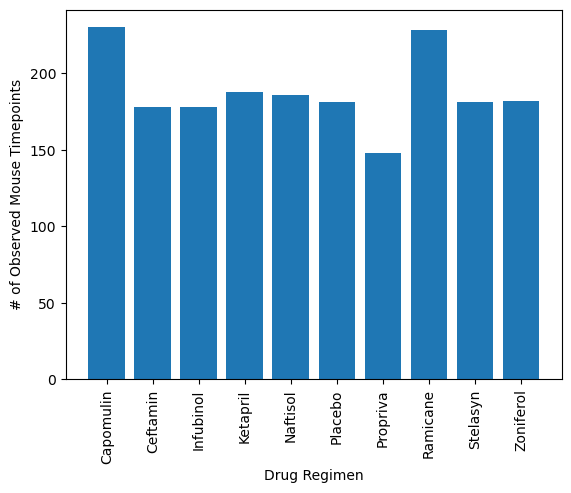

In [110]:
plt.bar(mice['Drug Regimen'], mice['Mouse ID'])
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

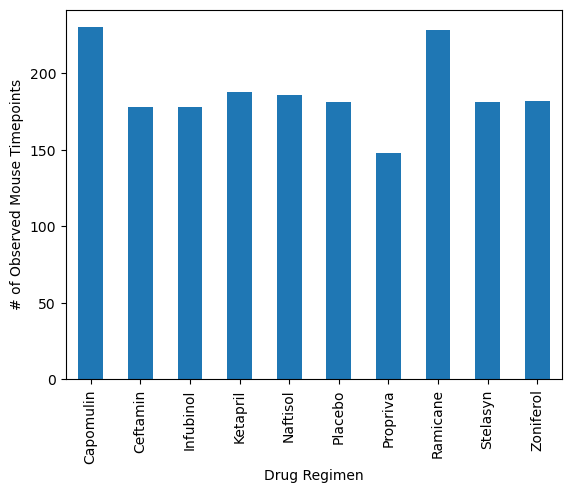

In [116]:
mice.plot(x='Drug Regimen', y='Mouse ID', kind='bar', legend=False)
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

In [121]:
sex = cleaned_data.groupby(['Sex'], as_index=False)['Mouse ID'].count()
sex

,Sex,Mouse ID
0,Female,922
1,Male,958


([<matplotlib.patches.Wedge at 0x179c9b090>,
 [Text(0.03308201408261561, 1.0995024239828841, 'Female'),
  Text(-0.0330820140826155, -1.0995024239828841, 'Male')],
 [Text(0.018044734954153967, 0.5997285948997549, '49.0%'),
  Text(-0.018044734954153905, -0.5997285948997549, '51.0%')])

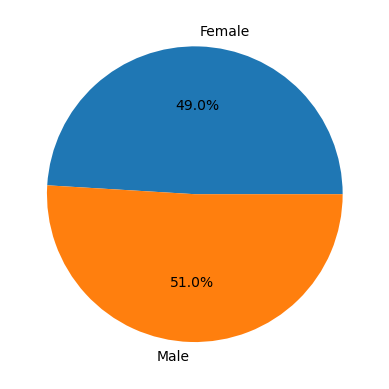

In [125]:
plt.pie(sex['Mouse ID'], autopct="%1.1f%%", labels=(sex['Sex']))

<Axes: ylabel='Mouse ID'>

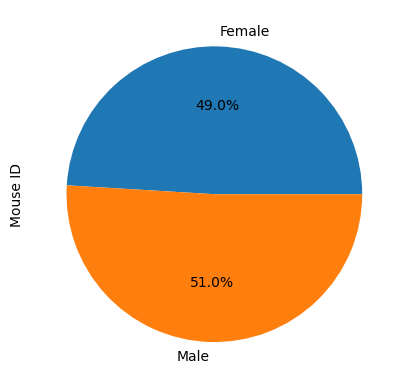

In [132]:
sex.plot(y='Mouse ID', kind='pie', autopct="%1.1f%%", labels=(sex['Sex']), legend=False)

In [186]:
last_timepoint_df = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
final_tumor_volume_df = last_timepoint_df.merge(cleaned_data, on = ['Mouse ID', 'Timepoint'], how='inner')
final_tumor_volume_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


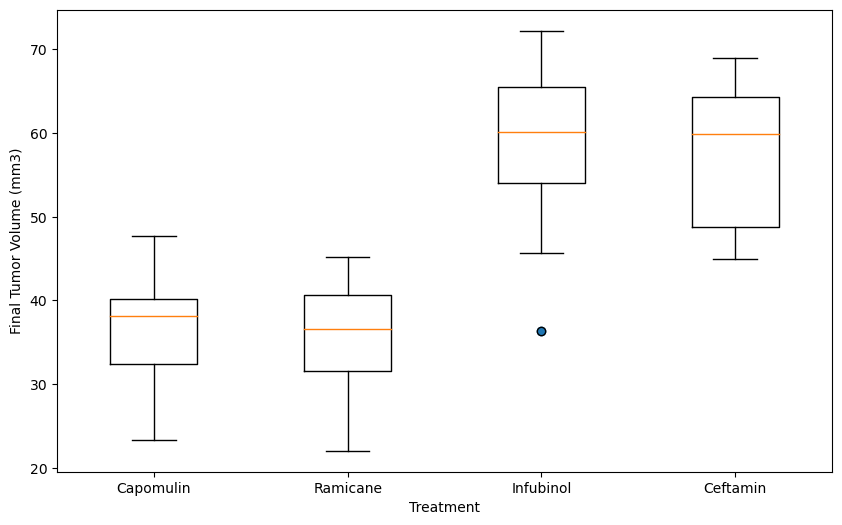

In [268]:
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume_data = []

for treatment in treatments:
    treatment_data = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen']==treatment]
    tumor_volume_data.append(treatment_data['Tumor Volume (mm3)'])
    
outliers = []

for i in range(len(treatments)):
    quartiles = tumor_volume_data[i].quantile([0.25, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 *iqr
    
    possible_outliers = tumor_volume_data[i][(tumor_volume_data[i] < lower_bound) | (tumor_volume_data[i] > upper_bound)]
    outliers.append(possible_outliers)
    
plt.figure(figsize=(10,6))
plt.boxplot(tumor_volume_data, labels=treatments)
plt.xlabel('Treatment')
plt.ylabel('Final Tumor Volume (mm3)')

for i, outlier_data in enumerate(outliers):
    if not outlier_data.empty:
        x_values = [i +1] *len(outlier_data)
        plt.scatter(x_values, outlier_data, marker='o')
        
plt.show()
    

In [271]:
outliers

[Series([], Name: Tumor Volume (mm3), dtype: float64),
 Series([], Name: Tumor Volume (mm3), dtype: float64),
 31    36.321346
 Name: Tumor Volume (mm3), dtype: float64,
 Series([], Name: Tumor Volume (mm3), dtype: float64)]

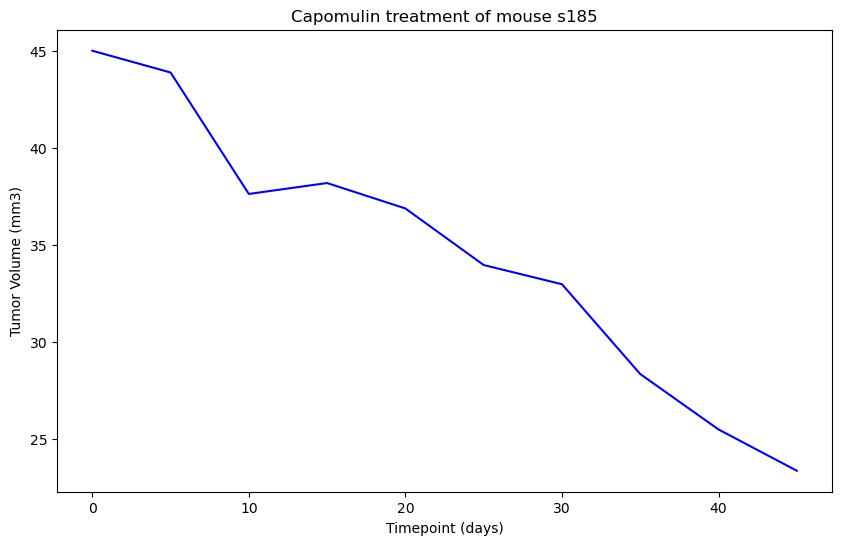

In [239]:
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

selected_mouse = 's185'
selected_mouse_data = capomulin_data[capomulin_data['Mouse ID']==selected_mouse]

plt.figure(figsize=(10,6))
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'], color='b')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of mouse {selected_mouse}')

plt.show()

In [240]:
capomulin_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1439,r157,Capomulin,Male,22,25,0,45.000000,0
1440,r157,Capomulin,Male,22,25,5,45.597064,0
1441,r157,Capomulin,Male,22,25,10,46.059608,0


In [250]:
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

average_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean().reset_index()
average_weight


,Mouse ID,Weight (g)
0,b128,22.0
1,b742,21.0
2,f966,17.0
3,g288,19.0
4,g316,22.0
5,i557,24.0
6,i738,20.0
7,j119,23.0
8,j246,21.0
9,l509,21.0


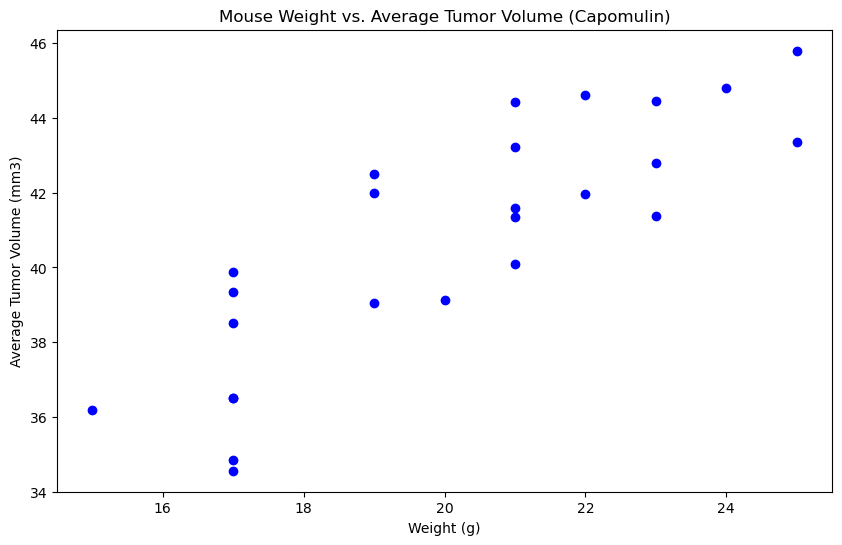

In [265]:
plt.figure(figsize=(10,6))
x_values = average_weight['Weight (g)']
y_values = average_tumor_volume['Tumor Volume (mm3)']
plt.scatter(x_values, y_values, marker='o', color='b')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')

plt.show()

In [257]:
(slope, intercept, rvalue, pvalue, stderr)= linregress(average_weight['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'])

In [258]:
slope

0.9544396890241047

In [259]:
intercept

21.55216053268501

In [262]:
rvalue #r value is the correlation coefficient
print(f'The correlation coefficient is {rvalue}')

The correlation coefficient is 0.841936342469472


In [263]:
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [264]:
line_eq

'y = 0.95x + 21.55'

In [266]:
regress_values = x_values * slope + intercept

Text(0.5, 1.0, 'Mouse Weight vs. Average Tumor Volume (Capomulin)')

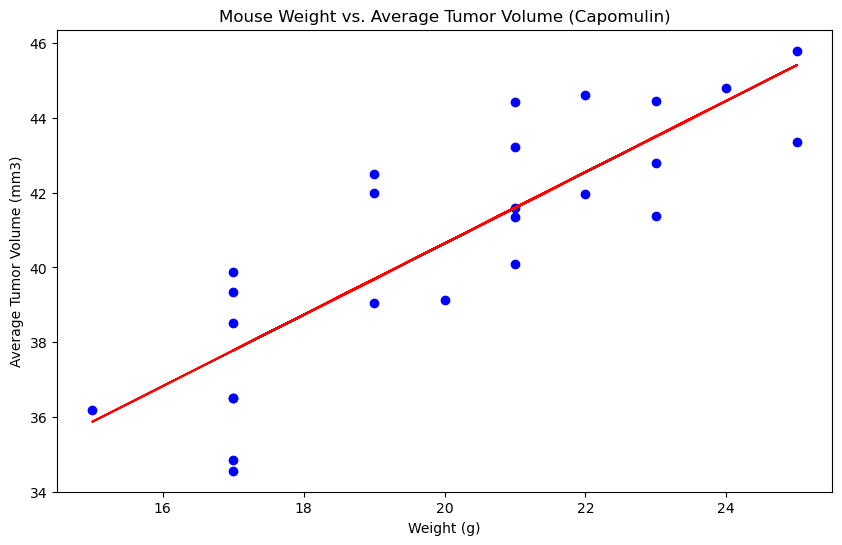

In [267]:
plt.figure(figsize=(10,6))
plt.scatter(average_weight['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'], marker='o', color='b')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
